In [1]:
from mirror_benchmarking import MB_Experiment

from selene_sim import DepolarizingErrorModel, Stim, Quest
from selene_custom_error_model import (
    BasicErrorModel,
    OneQubitErrorRates,
    TwoQubitErrorRates,
)

In [2]:
# select parameters and build experiment

n_qubits = 98
seq_lengths = [6, 12, 18] # half of circuit depth
seq_reps = 10 # number of repetitions of each sequence length
filename = 'exp_MB_example.py'

exp = MB_Experiment(n_qubits, seq_lengths, seq_reps)

# additional options
#exp.options['SQ_type'] = 'Clifford' # Clifford by default or 'Clifford+T'
#exp.options['Pauli_twirl'] = True # True by default
#exp.options['permute'] = True # True by default

exp.add_settings()

Having setup our MB experiment, we can now either simulate using a local simulator or submit to a hardware or emulator backend.

### Run local simulation using Selene

In [3]:
# setup error model

error_model = DepolarizingErrorModel(
    random_seed=1234,
    # single qubit gate error rate
    #p_1q=3e-5,
    # two qubit gate error rate
    p_2q=1e-3,
    # set state preparation and measurement error rates to 0
    p_meas=0,
    p_init=0,
)

In [4]:
# simulate experiment

shots = 100
simulator = Stim() # use Quest() if SQ_type = 'Clifford+T'

exp.sim(shots, error_model=error_model, simulator=simulator)

Simulating ...
1/30 circuits complete
2/30 circuits complete
3/30 circuits complete
4/30 circuits complete
5/30 circuits complete
6/30 circuits complete
7/30 circuits complete
8/30 circuits complete
9/30 circuits complete
10/30 circuits complete
11/30 circuits complete
12/30 circuits complete
13/30 circuits complete
14/30 circuits complete
15/30 circuits complete
16/30 circuits complete
17/30 circuits complete
18/30 circuits complete
19/30 circuits complete
20/30 circuits complete
21/30 circuits complete
22/30 circuits complete
23/30 circuits complete
24/30 circuits complete
25/30 circuits complete
26/30 circuits complete
27/30 circuits complete
28/30 circuits complete
29/30 circuits complete
30/30 circuits complete


### Submit to Quantinuum Hardware or Emulator backend using Nexus

In [ ]:
# Choose domain and login to Nexus

import qnexus
from qnexus.config import CONFIG

CONFIG.domain = "qa.myqos.com"
qnexus.login()

In [ ]:
# choose nexus project and setup quantinuum backend config

project = qnexus.projects.get_or_create(name='MB-example-project')
qnexus.context.set_active_project(project)

backend_config = qnexus.QuantinuumConfig(device_name='Helios-1E')

In [ ]:
# submit experiment. Returns a qnexus ExecuteJobRef

shots = 100

execute_job_ref = exp.submit(shots, backend_config)

In [ ]:
# inspect status of the execution job

qnexus.jobs.status(execute_job_ref)

In [ ]:
# retrieve results

exp.retrieve(execute_job_ref)

### Analyze experiment results

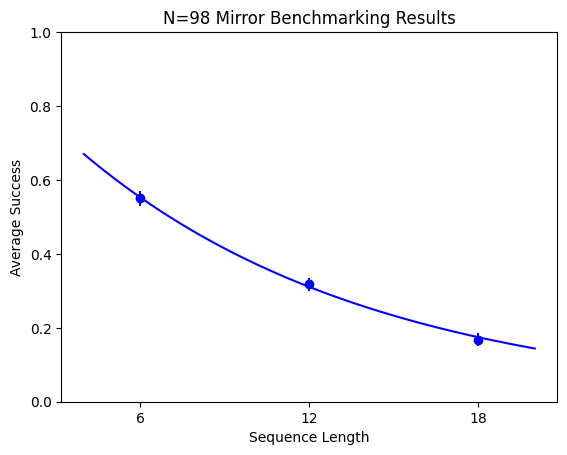

Success Probabilities
----------------------
6: 0.551 +/- 0.0202
12: 0.318 +/- 0.0173
18: 0.168 +/- 0.0181

Max circuit depth with survival > 2/3: 10

TQ Average Fidelity (for depolarizing error) = 0.9992 +/- 0.0001


In [5]:
exp.analyze_results(ylim=(0,1))

In [ ]:
# save experiment object to working directory

exp.save()